In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('#rape_tweets.csv')

In [3]:
df.head()

,Unnamed: 0,Tweets,id,lens,date,place,coordinateS,lang,source,likes,retweets
0,0,"b'RT @KaceyKells: KELLCEY ""This story not only...",1389681959329206272,140,2021-05-04 20:42:52,NaN,NaN,en,Twitter for iPhone,0,10284
1,1,b'RT @notice_com_ng: Man defiles his three tee...,1389681326786191362,139,2021-05-04 20:40:21,NaN,NaN,en,EndPoliceBrutality,0,2
2,2,"b'Man defiles his three teenage daughters, ano...",1389681304845828100,169,2021-05-04 20:40:16,NaN,NaN,en,notice.com.ng,1,2
3,3,"b'RT @KaceyKells: KELLCEY ""This story not only...",1389680872937426944,140,2021-05-04 20:38:33,NaN,NaN,en,Twitter Web App,0,10284
4,4,b'RT @PixelProject: #AFRICA: Abuse of women in...,1389679991621881856,132,2021-05-04 20:35:03,NaN,NaN,en,Twitter Web App,0,1


In [5]:
len(df['Tweets'][0])

154

In [6]:
df1=pd.read_csv('#GBV_tweets.csv')

In [7]:
df2=pd.read_csv('#sexism_tweets.csv')

In [8]:
df3=pd.read_csv('_metoo_tweets.csv')

In [9]:
df4=pd.read_csv('_domesticviolence_tweets.csv')

In [10]:
data=pd.concat([df,df1,df2,df3,df4])

In [11]:
data.shape

(61355, 11)

In [12]:
data.head()

,Unnamed: 0,Tweets,id,lens,date,place,coordinateS,lang,source,likes,retweets
0,0,"b'RT @KaceyKells: KELLCEY ""This story not only...",1389681959329206272,140,2021-05-04 20:42:52,NaN,NaN,en,Twitter for iPhone,0,10284
1,1,b'RT @notice_com_ng: Man defiles his three tee...,1389681326786191362,139,2021-05-04 20:40:21,NaN,NaN,en,EndPoliceBrutality,0,2
2,2,"b'Man defiles his three teenage daughters, ano...",1389681304845828100,169,2021-05-04 20:40:16,NaN,NaN,en,notice.com.ng,1,2
3,3,"b'RT @KaceyKells: KELLCEY ""This story not only...",1389680872937426944,140,2021-05-04 20:38:33,NaN,NaN,en,Twitter Web App,0,10284
4,4,b'RT @PixelProject: #AFRICA: Abuse of women in...,1389679991621881856,132,2021-05-04 20:35:03,NaN,NaN,en,Twitter Web App,0,1


In [13]:
# !pip install words

In [14]:
import re
import emoji
import nltk
def cleaner(tweet):
  # Remove @ sign
  tweet = re.sub("@[A-Za-z0-9]+","",tweet) 
  # Remove http links
  tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) 
  tweet = " ".join(tweet.split())
  # Remove Emojis
  tweet = ''.join(c for c in tweet if c not in emoji.UNICODE_EMOJI) 
  # Remove hashtag sign but keep the text
  tweet = tweet.replace("#", "").replace("_", " ") 
  # tokenize text and convert to lower case and digits
  tweet = " ".join(w for w in nltk.wordpunct_tokenize(tweet) if w.lower() in w or not w.isalpha())
  return tweet

# apply the function above to clean the tweets column
data['New_Tweets'] = data['Tweets'].map(lambda x: cleaner(x))

In [15]:
data.head()

,Unnamed: 0,Tweets,id,lens,date,place,coordinateS,lang,source,likes,retweets,New_Tweets
0,0,"b'RT @KaceyKells: KELLCEY ""This story not only...",1389681959329206272,140,2021-05-04 20:42:52,NaN,NaN,en,Twitter for iPhone,0,10284,"b ' : "" story not only bears witness to what c..."
1,1,b'RT @notice_com_ng: Man defiles his three tee...,1389681326786191362,139,2021-05-04 20:40:21,NaN,NaN,en,EndPoliceBrutality,0,2,b ' com ng : defiles his three teenage daughte...
2,2,"b'Man defiles his three teenage daughters, ano...",1389681304845828100,169,2021-05-04 20:40:16,NaN,NaN,en,notice.com.ng,1,2,"b ' defiles his three teenage daughters , anot..."
3,3,"b'RT @KaceyKells: KELLCEY ""This story not only...",1389680872937426944,140,2021-05-04 20:38:33,NaN,NaN,en,Twitter Web App,0,10284,"b ' : "" story not only bears witness to what c..."
4,4,b'RT @PixelProject: #AFRICA: Abuse of women in...,1389679991621881856,132,2021-05-04 20:35:03,NaN,NaN,en,Twitter Web App,0,1,b ' : : of women in \ n \ n '


In [16]:
data.columns

Index(['Unnamed: 0', 'Tweets', 'id', 'lens', 'date', 'place', 'coordinateS',
       'lang', 'source', 'likes', 'retweets', 'New_Tweets'],
      dtype='object')

In [17]:
del data['Unnamed: 0']

In [18]:
data.head()

,Tweets,id,lens,date,place,coordinateS,lang,source,likes,retweets,New_Tweets
0,"b'RT @KaceyKells: KELLCEY ""This story not only...",1389681959329206272,140,2021-05-04 20:42:52,NaN,NaN,en,Twitter for iPhone,0,10284,"b ' : "" story not only bears witness to what c..."
1,b'RT @notice_com_ng: Man defiles his three tee...,1389681326786191362,139,2021-05-04 20:40:21,NaN,NaN,en,EndPoliceBrutality,0,2,b ' com ng : defiles his three teenage daughte...
2,"b'Man defiles his three teenage daughters, ano...",1389681304845828100,169,2021-05-04 20:40:16,NaN,NaN,en,notice.com.ng,1,2,"b ' defiles his three teenage daughters , anot..."
3,"b'RT @KaceyKells: KELLCEY ""This story not only...",1389680872937426944,140,2021-05-04 20:38:33,NaN,NaN,en,Twitter Web App,0,10284,"b ' : "" story not only bears witness to what c..."
4,b'RT @PixelProject: #AFRICA: Abuse of women in...,1389679991621881856,132,2021-05-04 20:35:03,NaN,NaN,en,Twitter Web App,0,1,b ' : : of women in \ n \ n '


In [19]:
data['place'].isnull().sum()

60860

In [20]:
data['place'][8000]

nan

In [21]:
data.to_csv('data.csv')

In [22]:
df['place'][0]

nan

In [23]:
df.place.unique().tolist()

[nan,
 "Place(_api=<tweepy.api.API object at 0x00000223FDB1F470>, id='4c6bf2b7c14c8f88', url='https://api.twitter.com/1.1/geo/id/4c6bf2b7c14c8f88.json', place_type='admin', name='Maharashtra', full_name='Maharashtra, India', country_code='IN', country='India', contained_within=[], bounding_box=BoundingBox(_api=<tweepy.api.API object at 0x00000223FDB1F470>, type='Polygon', coordinates=[[[72.64293, 15.606794], [80.899558, 15.606794], [80.899558, 22.029028], [72.64293, 22.029028]]]), attributes={})",
 "Place(_api=<tweepy.api.API object at 0x00000223FDB1F470>, id='4a00f902bee39847', url='https://api.twitter.com/1.1/geo/id/4a00f902bee39847.json', place_type='city', name='Indore', full_name='Indore, India', country_code='IN', country='India', contained_within=[], bounding_box=BoundingBox(_api=<tweepy.api.API object at 0x00000223FDB1F470>, type='Polygon', coordinates=[[[75.690789, 22.525584], [76.245579, 22.525584], [76.245579, 22.817381], [75.690789, 22.817381]]]), attributes={})",
 "Place(_

In [24]:
df.shape

(4949, 11)

In [25]:
df.head()

,Unnamed: 0,Tweets,id,lens,date,place,coordinateS,lang,source,likes,retweets
0,0,"b'RT @KaceyKells: KELLCEY ""This story not only...",1389681959329206272,140,2021-05-04 20:42:52,NaN,NaN,en,Twitter for iPhone,0,10284
1,1,b'RT @notice_com_ng: Man defiles his three tee...,1389681326786191362,139,2021-05-04 20:40:21,NaN,NaN,en,EndPoliceBrutality,0,2
2,2,"b'Man defiles his three teenage daughters, ano...",1389681304845828100,169,2021-05-04 20:40:16,NaN,NaN,en,notice.com.ng,1,2
3,3,"b'RT @KaceyKells: KELLCEY ""This story not only...",1389680872937426944,140,2021-05-04 20:38:33,NaN,NaN,en,Twitter Web App,0,10284
4,4,b'RT @PixelProject: #AFRICA: Abuse of women in...,1389679991621881856,132,2021-05-04 20:35:03,NaN,NaN,en,Twitter Web App,0,1


In [26]:
df['source'].unique()

array(['Twitter for iPhone', 'EndPoliceBrutality', 'notice.com.ng',
       'Twitter Web App', 'Twitter for Android', 'TweetDeck',
       'Tweet Suite', 'RetweetsMumbaiOne', 'PulpNews', 'himachalibot',
       'hp_pk', 'Twitter for iPad', 'SocialPilot.co', '92 News HD',
       'Gender History Bot', 'NMB News', 'Natural Disasters Bot',
       'Buffer', 'twittbot.net', 'CodeAtt Bot', ' PixelTweeter',
       'AnyPoll Links', 'The Edinburgh Forum app', 'optimistic_bot',
       'HubSpot', 'Hootsuite Inc.', 'nigmit6', 'dlvr.it', 'Surgery2021',
       'Tech Nation News updates', 'Diaspora at pod.jns.im',
       'Hopscotch Social', 'CinchShare', 'Revive Social App',
       'Bible_robot', 'Besocy_Oficial', 'PollachiBot',
       'Anil Namma Pollachi', 'Instagram', 'Canva', 'LaterMedia',
       'WordPress.com', 'Naija.fm', 'the404codeBot',
       'Retweet Bot @wisehussein', 'IFTTT', 'Hocalwire Social Share',
       'TestforHeruku', 'vrgamersbot', 'Twitter for Mac', 'Jammu Bot',
       'Revive Old P

In [27]:
data.isna()

,Tweets,id,lens,date,place,coordinateS,lang,source,likes,retweets,New_Tweets
0,False,False,False,False,True,True,False,False,False,False,False
1,False,False,False,False,True,True,False,False,False,False,False
2,False,False,False,False,True,True,False,False,False,False,False
3,False,False,False,False,True,True,False,False,False,False,False
4,False,False,False,False,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
5021,False,False,False,False,True,True,False,False,False,False,False
5022,False,False,False,False,True,True,False,False,False,False,False
5023,False,False,False,False,True,True,False,False,False,False,False
5024,False,False,False,False,True,True,False,False,False,False,False


In [28]:
import matplotlib.pyplot as plt
all_words = ' '.join([text for text in data['New_Tweets']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

<Figure size 1000x700 with 1 Axes>

In [29]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt    

In [30]:
data['New'] = np.vectorize(remove_pattern)(data['New_Tweets'], "@[\w]*")

In [31]:
data.head()

,Tweets,id,lens,date,place,coordinateS,lang,source,likes,retweets,New_Tweets,New
0,"b'RT @KaceyKells: KELLCEY ""This story not only...",1389681959329206272,140,2021-05-04 20:42:52,NaN,NaN,en,Twitter for iPhone,0,10284,"b ' : "" story not only bears witness to what c...","b ' : "" story not only bears witness to what c..."
1,b'RT @notice_com_ng: Man defiles his three tee...,1389681326786191362,139,2021-05-04 20:40:21,NaN,NaN,en,EndPoliceBrutality,0,2,b ' com ng : defiles his three teenage daughte...,b ' com ng : defiles his three teenage daughte...
2,"b'Man defiles his three teenage daughters, ano...",1389681304845828100,169,2021-05-04 20:40:16,NaN,NaN,en,notice.com.ng,1,2,"b ' defiles his three teenage daughters , anot...","b ' defiles his three teenage daughters , anot..."
3,"b'RT @KaceyKells: KELLCEY ""This story not only...",1389680872937426944,140,2021-05-04 20:38:33,NaN,NaN,en,Twitter Web App,0,10284,"b ' : "" story not only bears witness to what c...","b ' : "" story not only bears witness to what c..."
4,b'RT @PixelProject: #AFRICA: Abuse of women in...,1389679991621881856,132,2021-05-04 20:35:03,NaN,NaN,en,Twitter Web App,0,1,b ' : : of women in \ n \ n ',b ' : : of women in \ n \ n '


In [32]:
data['New'] = data['New'].str.replace("[^a-zA-Z#]", " ")

In [33]:
data['New'] = data['New'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [34]:
data.New[0]

0    story only bears witness what countless other ...
0    tweeted about police stations women respond ve...
0        said would ever entertain thought mistreating
0                                                     
0    owns member criminal fraud guilty domesticviol...
Name: New, dtype: object

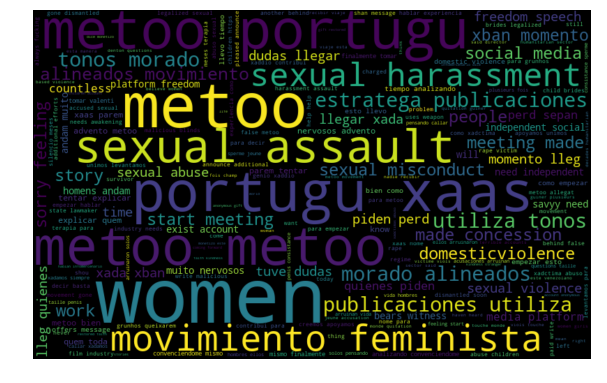

In [35]:
words = ' '.join([text for text in data['New']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [36]:
data['lang'].value_counts()

en     31905
es      9901
el      5296
und     5228
pt      2258
fr      2097
de      1258
ja      1133
ru       328
nl       294
hi       234
fa       189
it       164
is       156
ta       141
ar       140
sv       105
tl        67
da        64
in        63
tr        42
gu        31
pl        30
ur        26
ht        19
fi        18
et        16
zh        16
ne        15
iw        13
mr        10
ro        10
no        10
ko         9
cs         9
ca         8
bn         8
or         7
ml         7
sl         6
eu         4
th         4
te         3
ps         2
lv         2
sr         2
lt         2
pa         2
uk         1
kn         1
cy         1
Name: lang, dtype: int64

In [37]:
langs_count = data.lang.value_counts()


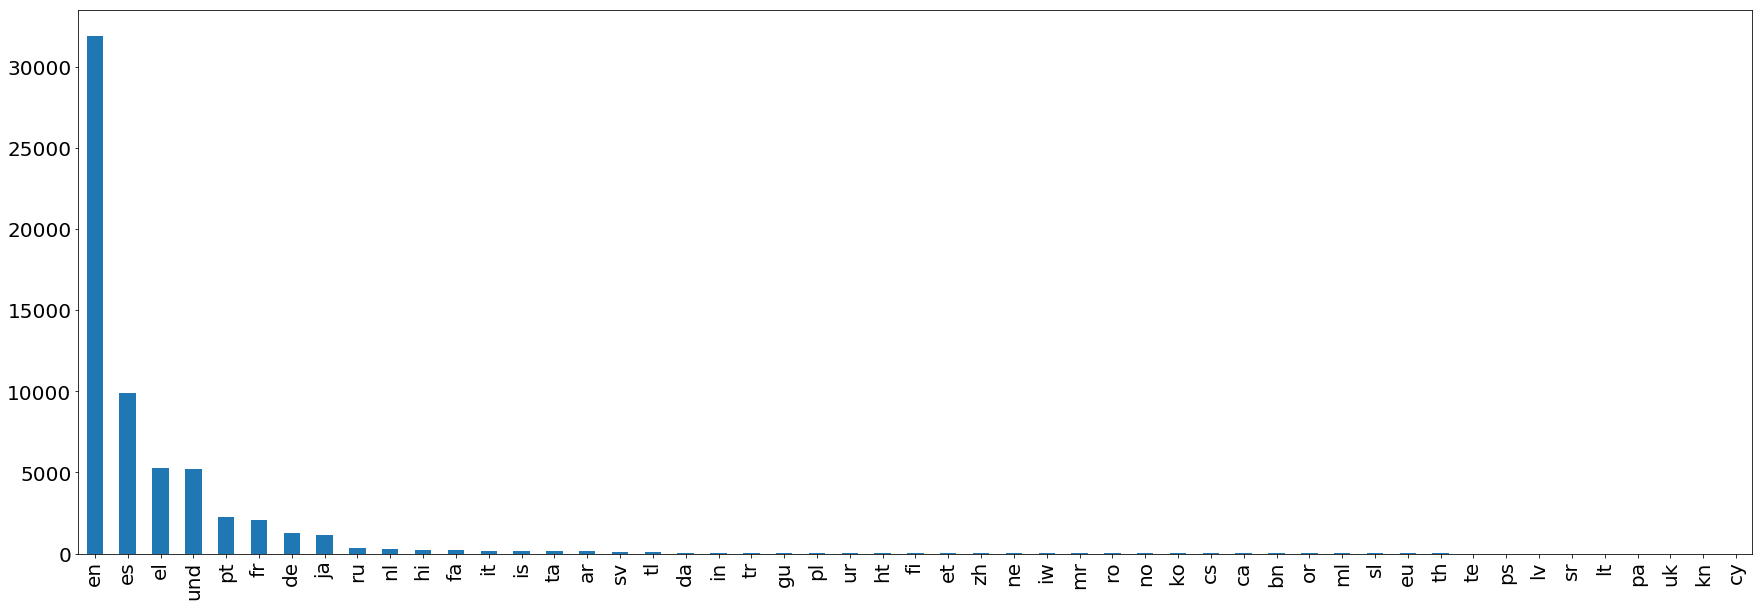

In [38]:
langs_count.plot.bar(figsize=(30,10), fontsize=20)


# From the lang we have more data on the English tweets than other languages and so we can discard them.

In [39]:
# indexNames = df[df['name'] == 'john'].index
ind=data[data.lang !='en'].index

In [40]:
newdf=data.drop(ind,inplace=True)  

In [41]:
newdf

In [42]:
data.head()

,Tweets,id,lens,date,place,coordinateS,lang,source,likes,retweets,New_Tweets,New
18,"b""#rape #think #painful Should #Bangladesh #Pa...",1389670422707326979,289,2021-05-04 19:57:02,NaN,NaN,en,Tweet Suite,0,0,"b "" rape think painful & amp ; ' s persecuted ...",rape think painful persecuted allow persecutor...
22,b'#Rape is being used as a weapon as fighting ...,1389670105639014406,277,2021-05-04 19:55:46,NaN,NaN,en,Twitter Web App,0,0,b ' is being used as a weapon as fighting rage...,being used weapon fighting rages remote parts ...
25,b'RT @JusticeOzzie: Christian Porter sporting ...,1389669311099269120,140,2021-05-04 19:52:37,NaN,NaN,en,Twitter Web App,0,26,b ' : sporting that \ xe2 \ x80 \ x98allegedly...,sporting that allegedly innocent look auspol
26,b'RT @Tesfaalem_: May 4 marks six months since...,1389668485379285005,144,2021-05-04 19:49:20,NaN,NaN,en,Twitter Web App,0,1,b ' : 4 marks six months since the start of ar...,marks months since start armed conflict betwee...
28,b'RT @MameTigray: #Rape is being used as a wea...,1389667641242030080,140,2021-05-04 19:45:59,NaN,NaN,en,Twitter Web App,0,1,b ' : is being used as a weapon in \ . \ \ \ \...,being used weapon


In [43]:
data.to_csv('New_data.csv')

In [46]:
data.columns

Index(['Tweets', 'id', 'lens', 'date', 'place', 'coordinateS', 'lang',
       'source', 'likes', 'retweets', 'New_Tweets', 'New'],
      dtype='object')

In [47]:
data['New']

18      rape think painful persecuted allow persecutor...
22      being used weapon fighting rages remote parts ...
25           sporting that allegedly innocent look auspol
26      marks months since start armed conflict betwee...
28                                      being used weapon
                              ...                        
4993    role criminal justice system responding import...
5011    emotional abusers good intimidating without mu...
5012    find safe place without constant fear abusive ...
5014    number women temporary visas presenting requir...
5019    charged with domesticviolence after victim kid...
Name: New, Length: 20674, dtype: object

In [52]:
data['New'][18]

18    rape think painful persecuted allow persecutor...
18    when outdated gender based violence implies th...
18                                                     
18    when spray will look with eyes should spray th...
18    thrilled join talk about domesticviolence vita...
Name: New, dtype: object

In [50]:
len(data['New'][18])

5